# Testing for Significance

In [1]:
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
from scipy.stats import mannwhitneyu
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
import saferdetections as detect

## Separating Detections by ion & Vir Rad Criteria

In [2]:
data= pd.read_csv('../galfit_spectral_refined_table_for_kirill_w_bval_3.csv')
detections_h1_05r= detect.sort_detections(data, ion= 'H_I', vir_rad= 0.5)
detections_h1_1r= detect.sort_detections(data, ion= 'H_I', vir_rad= 1)
detections_h1_2r= detect.sort_detections(data, ion= 'H_I', vir_rad= 2)
detections_o6_05r= detect.sort_detections(data, ion= 'O_VI', vir_rad= 0.5)
detections_o6_1r= detect.sort_detections(data, ion= 'O_VI', vir_rad= 1)
detections_o6_2r= detect.sort_detections(data, ion= 'O_VI', vir_rad= 2)

The max rho_rvir value in this data set is 0.4712706040314508
The total number of detections is 8
The max rho_rvir value in this data set is 0.948264985334893
The total number of detections is 20
The max rho_rvir value in this data set is 1.9802986082934129
The total number of detections is 51
The max rho_rvir value in this data set is 0.4604307416991528
The total number of detections is 12
The max rho_rvir value in this data set is 0.948264985334893
The total number of detections is 21
The max rho_rvir value in this data set is 1.9802986082934129
The total number of detections is 33


# Collecting data from each statistical test

## O VI Column Density: 0.5,1, and 2 virial radii

# <font color='magenta'>Adjust the "column" parameter here to look at different columns and compare statistical significance</font>

In [4]:
column= 'O_VI_total_log10_N'
i_vals= np.linspace(0,20,21)
# MannWhitneyU
p_values_mwu_o6_05r= []
p_values_mwu_o6_1r= []
p_values_mwu_o6_2r= []
# Students T
p_values_t_o6_05r= []
p_values_t_o6_1r= []
p_values_t_o6_2r= []
# KS 2Samp
res_ks2_o6_05r=[]
res_ks2_o6_1r= []
res_ks2_o6_2r= []
p_values_ks2_o6_05r=[]
p_values_ks2_o6_1r=[]
p_values_ks2_o6_2r=[]

# Virial Rad=0.5
for i in i_vals:
    # adjusting by 1 degree each time
    pole = detections_o6_05r[detections_o6_05r['azimuthal_angle']<(45-i)][column]
    disk = detections_o6_05r[detections_o6_05r['azimuthal_angle']>(45+i)][column]
    # find p values for mannwhitneyu test
    res_mwu = mannwhitneyu(pole, disk).pvalue
    p_values_mwu_o6_05r.append(res_mwu)
    # The Students T test
    res_t = ttest_ind(pole, disk).pvalue
    p_values_t_o6_05r.append(res_t)
    # The KS 2 Sample Test
    res_ks = ks_2samp(pole, disk)
    res_ks2_o6_05r.append(res_ks)

# Virial Rad= 1
for i in i_vals:
    # adjusting by 1 degree each time
    pole = detections_o6_1r[detections_o6_1r['azimuthal_angle']<(45-i)][column]
    disk = detections_o6_1r[detections_o6_1r['azimuthal_angle']>(45+i)][column]
   # find p values for mannwhitneyu test
    res_mwu = mannwhitneyu(pole, disk).pvalue
    p_values_mwu_o6_1r.append(res_mwu)
    # The Students T test
    res_t = ttest_ind(pole, disk).pvalue
    p_values_t_o6_1r.append(res_t)
    # The KS 2 Sample Test
    res_ks = ks_2samp(pole, disk)
    res_ks2_o6_1r.append(res_ks)
    
# Virial Rad=2
for i in i_vals:
    # adjusting by 1 degree each time
    pole = detections_o6_2r[detections_o6_2r['azimuthal_angle']<(45-i)][column]
    disk = detections_o6_2r[detections_o6_2r['azimuthal_angle']>(45+i)][column]
   # find p values for mannwhitneyu test
    res_mwu = mannwhitneyu(pole, disk).pvalue
    p_values_mwu_o6_2r.append(res_mwu)
    # The Students T test
    res_t = ttest_ind(pole, disk).pvalue
    p_values_t_o6_2r.append(res_t)
    # The KS 2 Sample Test
    res_ks = ks_2samp(pole, disk)
    res_ks2_o6_2r.append(res_ks)
    
# Creating a list of pvalues for the KS 2 Sample Test for Plotting
for value in res_ks2_o6_05r:
    stat, pval= value
    p_values_ks2_o6_05r.append(pval)
for value in res_ks2_o6_1r:
    stat, pval= value
    p_values_ks2_o6_1r.append(pval)
for value in res_ks2_o6_2r:
    stat, pval= value
    p_values_ks2_o6_2r.append(pval)

## H I Column Density: 0.5,1, and 2 virial radii

# <font color='magenta'>Adjust the "column" parameter here again to adjust the H I parameter to match the corresponding O VI plots </font>

In [5]:
column='H_I_total_log10_N'
# MannWhitneyU
p_values_mwu_h1_05r= []
p_values_mwu_h1_1r= []
p_values_mwu_h1_2r= []
# Students T
p_values_t_h1_05r= []
p_values_t_h1_1r= []
p_values_t_h1_2r= []
# KS 2Samp
res_ks2_h1_05r=[]
res_ks2_h1_1r= []
res_ks2_h1_2r= []
p_values_ks2_h1_05r=[]
p_values_ks2_h1_1r=[]
p_values_ks2_h1_2r=[]

# Virial Rad=0.5
for i in i_vals:
    # adjusting by 1 degree each time
    pole = detections_h1_05r[detections_h1_05r['azimuthal_angle']<(45-i)][column]
    disk = detections_h1_05r[detections_h1_05r['azimuthal_angle']>(45+i)][column]
    # find p values for mannwhitneyu test
    res_mwu = mannwhitneyu(pole, disk).pvalue
    p_values_mwu_h1_05r.append(res_mwu)
    # The Students T test
    res_t = ttest_ind(pole, disk).pvalue
    p_values_t_h1_05r.append(res_t)
    # The KS 2 Sample Test
    res_ks = ks_2samp(pole, disk)
    res_ks2_h1_05r.append(res_ks)

# Virial Rad= 1
for i in i_vals:
    # adjusting by 1 degree each time
    pole = detections_h1_1r[detections_h1_1r['azimuthal_angle']<(45-i)][column]
    disk = detections_h1_1r[detections_h1_1r['azimuthal_angle']>(45+i)][column]
   # find p values for mannwhitneyu test
    res_mwu = mannwhitneyu(pole, disk).pvalue
    p_values_mwu_h1_1r.append(res_mwu)
    # The Students T test
    res_t = ttest_ind(pole, disk).pvalue
    p_values_t_h1_1r.append(res_t)
    # The KS 2 Sample Test
    res_ks = ks_2samp(pole, disk)
    res_ks2_h1_1r.append(res_ks)
    
# Virial Rad=2
for i in i_vals:
    # adjusting by 1 degree each time
    pole = detections_h1_2r[detections_h1_2r['azimuthal_angle']<(45-i)][column]
    disk = detections_h1_2r[detections_h1_2r['azimuthal_angle']>(45+i)][column]
   # find p values for mannwhitneyu test
    res_mwu = mannwhitneyu(pole, disk).pvalue
    p_values_mwu_h1_2r.append(res_mwu)
    # The Students T test
    res_t = ttest_ind(pole, disk).pvalue
    p_values_t_h1_2r.append(res_t)
    # The KS 2 Sample Test
    res_ks = ks_2samp(pole, disk)
    res_ks2_h1_2r.append(res_ks)
    
# Creating a list of pvalues for the KS 2 Sample Test for Plotting
for value in res_ks2_h1_05r:
    stat, pval= value
    p_values_ks2_h1_05r.append(pval)
for value in res_ks2_h1_1r:
    stat, pval= value
    p_values_ks2_h1_1r.append(pval)
for value in res_ks2_h1_2r:
    stat, pval= value
    p_values_ks2_h1_2r.append(pval)

## Creating Data Frame for resultant P values for each test for first O VI and then H I

In [6]:
data_o6 = {
    'i_vals': i_vals,
    'max_polar': 45-i_vals,
    'min_disk': 45+i_vals,
    'MannW_05r': p_values_mwu_o6_05r,
    'StudT_05r': p_values_t_o6_05r,
    'KS2_05r': p_values_ks2_o6_05r,
    
    'MannW_1r': p_values_mwu_o6_1r,
    'StudT_1r': p_values_t_o6_1r,
    'KS2_1r': p_values_ks2_o6_1r,
    
    'MannW_2r': p_values_mwu_o6_2r,
    'StudT_2r': p_values_t_o6_2r,
    'KS2_2r': p_values_ks2_o6_2r
}

# Create a DataFrame
o6_p_data = pd.DataFrame(data_o6)
o6_p_data

,i_vals,max_polar,min_disk,MannW_05r,StudT_05r,KS2_05r,MannW_1r,StudT_1r,KS2_1r,MannW_2r,StudT_2r,KS2_2r
0,0.0,45.0,45.0,0.349394,0.363626,0.513131,0.612262,0.617501,0.519276,0.042480,0.065539,0.072263
1,1.0,44.0,46.0,0.109531,0.033512,0.250000,0.323015,0.264213,0.210784,0.010960,0.015187,0.026256
2,2.0,43.0,47.0,0.109531,0.033512,0.250000,0.323015,0.264213,0.210784,0.010960,0.015187,0.026256
3,3.0,42.0,48.0,0.109531,0.033512,0.250000,0.369088,0.323696,0.214932,0.012027,0.016874,0.033627
4,4.0,41.0,49.0,0.109531,0.033512,0.250000,0.369088,0.323696,0.214932,0.012027,0.016874,0.033627
5,5.0,40.0,50.0,0.109531,0.033512,0.250000,0.369088,0.323696,0.214932,0.012027,0.016874,0.033627
6,6.0,39.0,51.0,0.303484,0.154326,0.555556,0.670333,0.602265,0.640659,0.020131,0.028899,0.060318
7,7.0,38.0,52.0,0.303484,0.154326,0.555556,0.670333,0.602265,0.640659,0.020131,0.028899,0.060318
8,8.0,37.0,53.0,0.303484,0.154326,0.555556,0.670333,0.602265,0.640659,0.020131,0.028899,0.060318
9,9.0,36.0,54.0,0.303484,0.154326,0.555556,0.670333,0.602265,0.640659,0.020131,0.028899,0.060318


In [7]:
data_h1 = {
    'i_vals': i_vals,
    'max_polar': 45-i_vals,
    'min_disk': 45+i_vals,
    'MannW_05r': p_values_mwu_h1_05r,
    'StudT_05r': p_values_t_h1_05r,
    'KS2_05r': p_values_ks2_h1_05r,
    
    'MannW_1r': p_values_mwu_h1_1r,
    'StudT_1r': p_values_t_h1_1r,
    'KS2_1r': p_values_ks2_h1_1r,
    
    'MannW_2r': p_values_mwu_h1_2r,
    'StudT_2r': p_values_t_h1_2r,
    'KS2_2r': p_values_ks2_h1_2r
}

# Create a DataFrame
h1_p_data = pd.DataFrame(data_h1)
h1_p_data

,i_vals,max_polar,min_disk,MannW_05r,StudT_05r,KS2_05r,MannW_1r,StudT_1r,KS2_1r,MannW_2r,StudT_2r,KS2_2r
0,0.0,45.0,45.0,0.548595,0.517553,0.857143,0.511324,0.370034,0.897071,0.818293,0.935922,0.992667
1,1.0,44.0,46.0,0.481120,0.322605,0.933333,0.405660,0.280978,0.753342,0.924389,0.957868,0.994885
2,2.0,43.0,47.0,0.481120,0.322605,0.933333,0.405660,0.280978,0.753342,0.845253,0.949488,0.953884
3,3.0,42.0,48.0,0.481120,0.322605,0.933333,0.405660,0.280978,0.753342,0.845253,0.949488,0.953884
4,4.0,41.0,49.0,0.481120,0.322605,0.933333,0.405660,0.280978,0.753342,0.735546,0.857206,0.912164
5,5.0,40.0,50.0,0.481120,0.322605,0.933333,0.457392,0.311810,0.647552,0.796690,0.871913,0.837362
6,6.0,39.0,51.0,0.481120,0.322605,0.933333,0.457392,0.311810,0.647552,0.796690,0.871913,0.837362
7,7.0,38.0,52.0,0.481120,0.322605,0.933333,0.457392,0.311810,0.647552,0.796690,0.871913,0.837362
8,8.0,37.0,53.0,0.481120,0.322605,0.933333,0.684375,0.421196,0.846620,0.762903,0.859862,0.784536
9,9.0,36.0,54.0,0.481120,0.322605,0.933333,0.684375,0.421196,0.846620,0.572281,0.705726,0.684765


# Creating Plots of Stats Results as a Function of Polar Limit

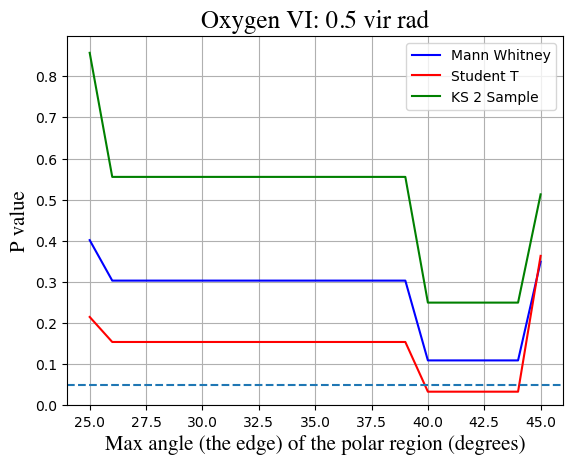

In [8]:
options= ['MannW_05r','StudT_05r','KS2_05r']
plt.plot(o6_p_data['max_polar'], o6_p_data[options[0]], label='Mann Whitney', color='blue')
plt.plot(o6_p_data['max_polar'], o6_p_data[options[1]], label='Student T', color='red')
plt.plot(o6_p_data['max_polar'], o6_p_data[options[2]], label='KS 2 Sample', color='green')
plt.legend()
plt.grid()
plt.title('Oxygen VI: 0.5 vir rad', font='Times', size=18)
plt.axhline(y=0.05, linestyle= '--')
#plt.suptitle('min P value occurs at pole>35 and disk<35',font='Times', size=15)
plt.ylabel('P value', font='Times', size=15)
plt.xlabel('Max angle (the edge) of the polar region (degrees)', font='Times', size=15)
plt.ylim(ymin=0);

In [9]:
print(r" The average P value for Mann Whitney is {}. The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[0]].mean(),3),round(o6_p_data[options[0]].min(),3),list(o6_p_data[o6_p_data[options[0]]==min(o6_p_data[options[0]])]['max_polar'].reset_index(drop=True))))
print(r" The average P value for Student T is {}.  The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[1]].mean(),3),round(o6_p_data[options[1]].min(),3),list(o6_p_data[o6_p_data[options[1]]==min(o6_p_data[options[1]])]['max_polar'].reset_index(drop=True))))
print(r" The average P value for KS 2 Sample is {}.  The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[2]].mean(),3),round(o6_p_data[options[2]].min(),3),list(o6_p_data[o6_p_data[options[2]]==min(o6_p_data[options[2]])]['max_polar'].reset_index(drop=True))))

 The average P value for Mann Whitney is 0.264. The minimum P value is 0.11 and this is found at a max polar angle of [44.0, 43.0, 42.0, 41.0, 40.0].
 The average P value for Student T is 0.138.  The minimum P value is 0.034 and this is found at a max polar angle of [44.0, 43.0, 42.0, 41.0, 40.0].
 The average P value for KS 2 Sample is 0.495.  The minimum P value is 0.25 and this is found at a max polar angle of [44.0, 43.0, 42.0, 41.0, 40.0].


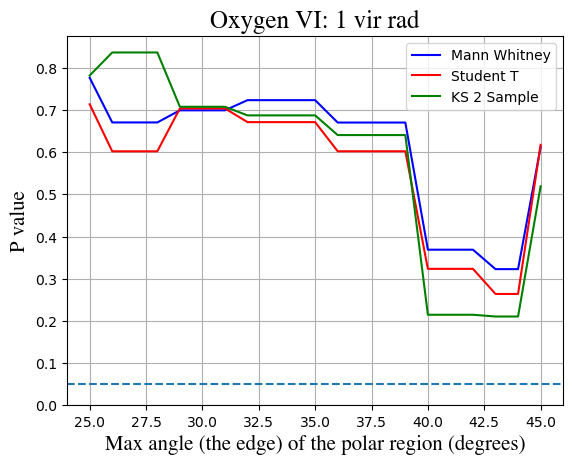

In [10]:
options= ['MannW_1r','StudT_1r','KS2_1r']
plt.plot(o6_p_data['max_polar'], o6_p_data[options[0]], label='Mann Whitney', color='blue')
plt.plot(o6_p_data['max_polar'], o6_p_data[options[1]], label='Student T', color='red')
plt.plot(o6_p_data['max_polar'], o6_p_data[options[2]], label='KS 2 Sample', color='green')
plt.legend()
plt.grid()
plt.title('Oxygen VI: 1 vir rad', font='Times', size=18)
plt.axhline(y=0.05, linestyle= '--')
#plt.suptitle('min P value occurs at pole>35 and disk<35',font='Times', size=15)
plt.ylabel('P value', font='Times', size=15)
plt.xlabel('Max angle (the edge) of the polar region (degrees)', font='Times', size=15)
plt.ylim(ymin=0);

In [11]:
print(r" The average P value for Mann Whitney is {}. The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[0]].mean(),3),round(o6_p_data[options[0]].min(),3),list(o6_p_data[o6_p_data[options[0]]==min(o6_p_data[options[0]])]['max_polar'].reset_index(drop=True))))
print(r" The average P value for Student T is {}.  The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[1]].mean(),3),round(o6_p_data[options[1]].min(),3),list(o6_p_data[o6_p_data[options[1]]==min(o6_p_data[options[1]])]['max_polar'].reset_index(drop=True))))
print(r" The average P value for KS 2 Sample is {}.  The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[2]].mean(),3),round(o6_p_data[options[2]].min(),3),list(o6_p_data[o6_p_data[options[2]]==min(o6_p_data[options[2]])]['max_polar'].reset_index(drop=True))))

 The average P value for Mann Whitney is 0.611. The minimum P value is 0.323 and this is found at a max polar angle of [44.0, 43.0].
 The average P value for Student T is 0.564.  The minimum P value is 0.264 and this is found at a max polar angle of [44.0, 43.0].
 The average P value for KS 2 Sample is 0.586.  The minimum P value is 0.211 and this is found at a max polar angle of [44.0, 43.0].


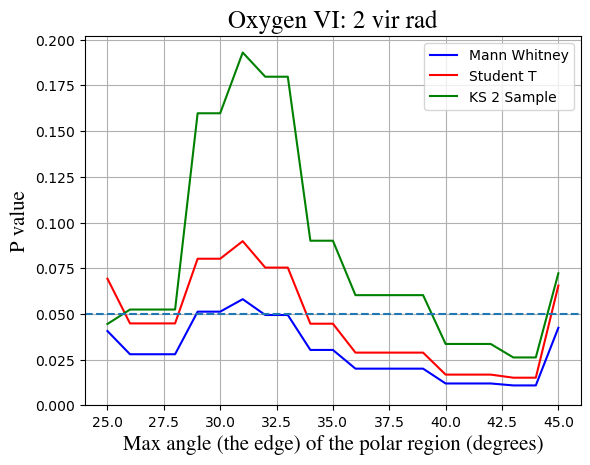

In [12]:
options= ['MannW_2r','StudT_2r','KS2_2r']
plt.plot(o6_p_data['max_polar'], o6_p_data[options[0]], label='Mann Whitney', color='blue')
plt.plot(o6_p_data['max_polar'], o6_p_data[options[1]], label='Student T', color='red')
plt.plot(o6_p_data['max_polar'], o6_p_data[options[2]], label='KS 2 Sample', color='green')
plt.legend()
plt.grid()
plt.title('Oxygen VI: 2 vir rad', font='Times', size=18)
#plt.suptitle('min P value occurs at pole>35 and disk<35',font='Times', size=15)
plt.ylabel('P value', font='Times', size=15)
plt.axhline(y=0.05, linestyle= '--')
plt.xlabel('Max angle (the edge) of the polar region (degrees)', font='Times', size=15)
plt.ylim(ymin=0);

In [13]:
print(r" The average P value for Mann Whitney is {}. The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[0]].mean(),3),round(o6_p_data[options[0]].min(),3),list(o6_p_data[o6_p_data[options[0]]==min(o6_p_data[options[0]])]['max_polar'].reset_index(drop=True))))
print(r" The average P value for Student T is {}.  The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[1]].mean(),3),round(o6_p_data[options[1]].min(),3),list(o6_p_data[o6_p_data[options[1]]==min(o6_p_data[options[1]])]['max_polar'].reset_index(drop=True))))
print(r" The average P value for KS 2 Sample is {}.  The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[2]].mean(),3),round(o6_p_data[options[2]].min(),3),list(o6_p_data[o6_p_data[options[2]]==min(o6_p_data[options[2]])]['max_polar'].reset_index(drop=True))))

 The average P value for Mann Whitney is 0.03. The minimum P value is 0.011 and this is found at a max polar angle of [44.0, 43.0].
 The average P value for Student T is 0.046.  The minimum P value is 0.015 and this is found at a max polar angle of [44.0, 43.0].
 The average P value for KS 2 Sample is 0.082.  The minimum P value is 0.026 and this is found at a max polar angle of [44.0, 43.0].


# H I Compative Analysis 

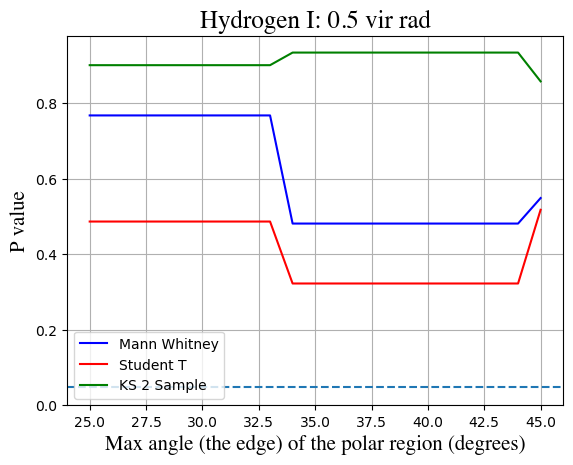

In [14]:
options= ['MannW_05r','StudT_05r','KS2_05r']
plt.plot(h1_p_data['max_polar'], h1_p_data[options[0]], label='Mann Whitney', color='blue')
plt.plot(h1_p_data['max_polar'], h1_p_data[options[1]], label='Student T', color='red')
plt.plot(h1_p_data['max_polar'], h1_p_data[options[2]], label='KS 2 Sample', color='green')
plt.legend()
plt.grid()
plt.title('Hydrogen I: 0.5 vir rad', font='Times', size=18)
plt.axhline(y=0.05, linestyle= '--')
#plt.suptitle('min P value occurs at pole>35 and disk<35',font='Times', size=15)
plt.ylabel('P value', font='Times', size=15)
plt.xlabel('Max angle (the edge) of the polar region (degrees)', font='Times', size=15)
plt.ylim(ymin=0);

In [15]:
print(r" The average P value for Mann Whitney is {}. The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[0]].mean(),3),round(o6_p_data[options[0]].min(),3),list(o6_p_data[o6_p_data[options[0]]==min(o6_p_data[options[0]])]['max_polar'].reset_index(drop=True))))
print(r" The average P value for Student T is {}.  The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[1]].mean(),3),round(o6_p_data[options[1]].min(),3),list(o6_p_data[o6_p_data[options[1]]==min(o6_p_data[options[1]])]['max_polar'].reset_index(drop=True))))
print(r" The average P value for KS 2 Sample is {}.  The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[2]].mean(),3),round(o6_p_data[options[2]].min(),3),list(o6_p_data[o6_p_data[options[2]]==min(o6_p_data[options[2]])]['max_polar'].reset_index(drop=True))))

 The average P value for Mann Whitney is 0.264. The minimum P value is 0.11 and this is found at a max polar angle of [44.0, 43.0, 42.0, 41.0, 40.0].
 The average P value for Student T is 0.138.  The minimum P value is 0.034 and this is found at a max polar angle of [44.0, 43.0, 42.0, 41.0, 40.0].
 The average P value for KS 2 Sample is 0.495.  The minimum P value is 0.25 and this is found at a max polar angle of [44.0, 43.0, 42.0, 41.0, 40.0].


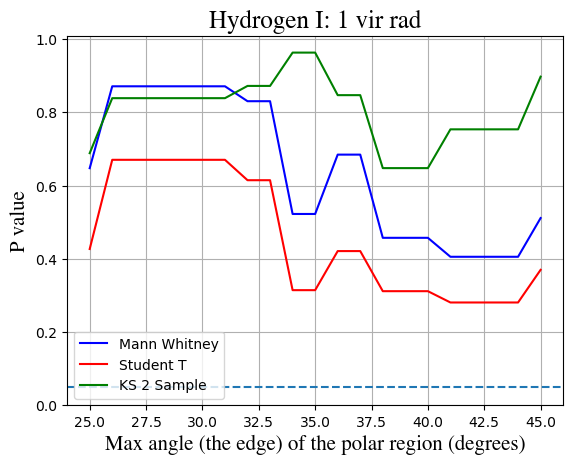

In [16]:
options= ['MannW_1r','StudT_1r','KS2_1r']
plt.plot(h1_p_data['max_polar'], h1_p_data[options[0]], label='Mann Whitney', color='blue')
plt.plot(h1_p_data['max_polar'], h1_p_data[options[1]], label='Student T', color='red')
plt.plot(h1_p_data['max_polar'], h1_p_data[options[2]], label='KS 2 Sample', color='green')
plt.legend()
plt.grid()
plt.title('Hydrogen I: 1 vir rad', font='Times', size=18)
plt.axhline(y=0.05, linestyle= '--')
#plt.suptitle('min P value occurs at pole>35 and disk<35',font='Times', size=15)
plt.ylabel('P value', font='Times', size=15)
plt.xlabel('Max angle (the edge) of the polar region (degrees)', font='Times', size=15)
plt.ylim(ymin=0);

In [17]:
print(r" The average P value for Mann Whitney is {}. The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[0]].mean(),3),round(o6_p_data[options[0]].min(),3),list(o6_p_data[o6_p_data[options[0]]==min(o6_p_data[options[0]])]['max_polar'].reset_index(drop=True))))
print(r" The average P value for Student T is {}.  The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[1]].mean(),3),round(o6_p_data[options[1]].min(),3),list(o6_p_data[o6_p_data[options[1]]==min(o6_p_data[options[1]])]['max_polar'].reset_index(drop=True))))
print(r" The average P value for KS 2 Sample is {}.  The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[2]].mean(),3),round(o6_p_data[options[2]].min(),3),list(o6_p_data[o6_p_data[options[2]]==min(o6_p_data[options[2]])]['max_polar'].reset_index(drop=True))))

 The average P value for Mann Whitney is 0.611. The minimum P value is 0.323 and this is found at a max polar angle of [44.0, 43.0].
 The average P value for Student T is 0.564.  The minimum P value is 0.264 and this is found at a max polar angle of [44.0, 43.0].
 The average P value for KS 2 Sample is 0.586.  The minimum P value is 0.211 and this is found at a max polar angle of [44.0, 43.0].


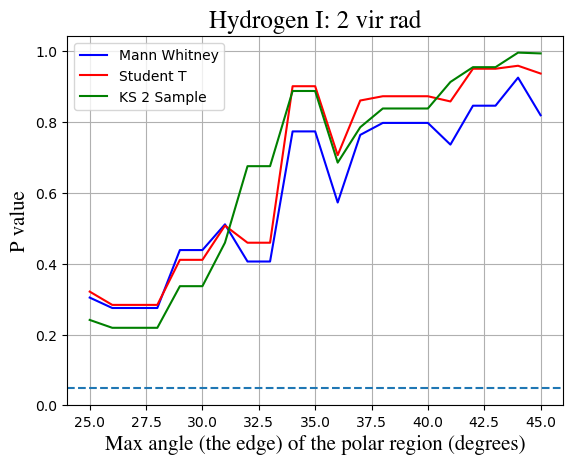

In [18]:
options= ['MannW_2r','StudT_2r','KS2_2r']
plt.plot(h1_p_data['max_polar'], h1_p_data[options[0]], label='Mann Whitney', color='blue')
plt.plot(h1_p_data['max_polar'], h1_p_data[options[1]], label='Student T', color='red')
plt.plot(h1_p_data['max_polar'], h1_p_data[options[2]], label='KS 2 Sample', color='green')
plt.legend()
plt.grid()
plt.title('Hydrogen I: 2 vir rad', font='Times', size=18)
plt.axhline(y=0.05, linestyle= '--')
#plt.suptitle('min P value occurs at pole>35 and disk<35',font='Times', size=15)
plt.ylabel('P value', font='Times', size=15)
plt.xlabel('Max angle (the edge) of the polar region (degrees)', font='Times', size=15)
plt.ylim(ymin=0);

In [19]:
print(r" The average P value for Mann Whitney is {}. The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[0]].mean(),3),round(o6_p_data[options[0]].min(),3),list(o6_p_data[o6_p_data[options[0]]==min(o6_p_data[options[0]])]['max_polar'].reset_index(drop=True))))
print(r" The average P value for Student T is {}.  The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[1]].mean(),3),round(o6_p_data[options[1]].min(),3),list(o6_p_data[o6_p_data[options[1]]==min(o6_p_data[options[1]])]['max_polar'].reset_index(drop=True))))
print(r" The average P value for KS 2 Sample is {}.  The minimum P value is {} and this is found at a max polar angle of {}.".format(round(o6_p_data[options[2]].mean(),3),round(o6_p_data[options[2]].min(),3),list(o6_p_data[o6_p_data[options[2]]==min(o6_p_data[options[2]])]['max_polar'].reset_index(drop=True))))

 The average P value for Mann Whitney is 0.03. The minimum P value is 0.011 and this is found at a max polar angle of [44.0, 43.0].
 The average P value for Student T is 0.046.  The minimum P value is 0.015 and this is found at a max polar angle of [44.0, 43.0].
 The average P value for KS 2 Sample is 0.082.  The minimum P value is 0.026 and this is found at a max polar angle of [44.0, 43.0].
